### Some test runs which you might try to play with the code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from sirs import Sirs, SirsSolver

In [2]:
## I have been careful to make good docstrings for ease of use:
?Sirs

Init signature:
Sirs(
    N0,
    I0,
    A=0,
    a=4,
    b=2,
    c=0.5,
    d=0,
    dI=0,
    e=0,
    F=0,
    f=0,
    fa=None,
    ff=None,
)
Docstring:      <no docstring>
Init docstring: Instantiate with initial pop. size and number of infected I0. A,a are the amplitude and average of the seasonal infection rate; b is the recovery rate; c is the immunity loss rate; d is the population death rate from other causes; dI is the insidence death rate; e is the population birth rate; F,f are the amplitude and average of the seasonal vaccination rate; fa,ff accept functions func(t) for infection and vaccination rates.
File:           ~/Documents/stud/FYS4150/project5/source/sirs.py
Type:           type
Subclasses:     


In [3]:
# First a simple case
N0 = 400
I0 = 100
sirs = Sirs(N0, I0, a=4, b=1, c=.5)
solver = SirsSolver(sirs)
solver.run_mc(t_max=15, seed=1)
S, I, R, N = solver.get_fractions()
S

array([0.75  , 0.7475, 0.745 , ..., 0.25  , 0.25  , 0.25  ])

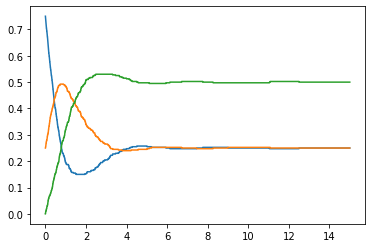

In [4]:
plt.plot(solver.t, S)
plt.plot(solver.t, I)
plt.plot(solver.t, R)

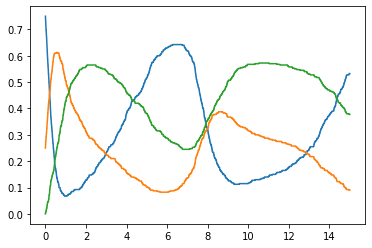

In [5]:
# Now let's introduce seasonal transmission rate a by specifying the amplitude A
N0 = 400
I0 = 100
sirs = Sirs(N0, I0, A=3, a=4, b=1, c=.5)
solver = SirsSolver(sirs)
solver.run_mc(t_max=15, seed=1)
S, I, R, N = solver.get_fractions()
plt.plot(solver.t, S)
plt.plot(solver.t, I)
plt.plot(solver.t, R)

In [6]:
# The same can be done for the vaccination rate, by specifying f,F -- but we may also specify a function and
# send that in as ff=func argument. Here we will use the functions provided in utils.py to construct a
# custom function
?exponential_growth

Signature: exponential_growth(t, lmd, floor=0.0, delay=0.0)
Docstring: Exponential growth function. Grows exponentially from floor until value 1 at t=delay with time constant (half life time) lmd lmd; then keeps value 1.
File:      ~/Documents/stud/FYS4150/project5/source/utils.py
Type:      function


In [7]:
?seasonal_variation

Signature:
seasonal_variation(
    t,
    a=0.5,
    A=0.5,
    multiplier=1,
    freq_multiplier=1,
    shift=0,
)
Docstring: Seasonal variation with mean a*multiplier, amplitude A*multiplier, period 10*freq_multiplier and phase shifted by shift.
File:      ~/Documents/stud/FYS4150/project5/source/utils.py
Type:      function


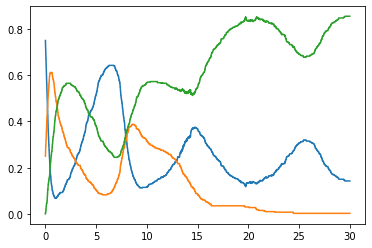

In [8]:
N0 = 400
I0 = 100
ff = (lambda t: exponential_growth(t, .5, delay=15)*seasonal_variation(t, a=2, A=1))
sirs = Sirs(N0, I0, A=3, a=4, b=1, c=.5, ff=ff)
solver = SirsSolver(sirs)
solver.run_mc(t_max=30, seed=1)
S, I, R, N = solver.get_fractions()
plt.plot(solver.t, S)
plt.plot(solver.t, I)
plt.plot(solver.t, R)